<center>
    <img src="https://dkraftlearning.com/wp-content/uploads/dkraft-logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


 # Machine Learning Internship Test

# General Instructions : 
        1. You can use either pytorch or tensorflow to build and train your networks.
        2. Pretrained models of any sort are expressly forbidden. You must build your model from scratch(Also refer to 1.).
        3. You are free to choose/tune hyperparameters to your liking. 
        4. The use of the scikit-learn library is allowed.


# **Lab 1: [GAN] Build and train a Generative Adversarial Network from scratch on the CIFAR 10 dataset**


# Collecting the data of CIFAR 10, Click <a href =https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz>CIFAR 10 dataset</a>



Estimated time needed: **2** hours


In [ ]:
#Import important Librariries
#GAN
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D 
from tensorflow.keras.layers.advanced_activations import LeakyReLU 
from tensorflow.keras.layers.convolutional import UpSampling2D, Conv2D 
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.optimizers import Adam,SGD
#CNN
import os
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Download and Unzip Dataset
!pip install wget
import wget

url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"

wget.download(url, '/content/cifar-100.tar.gz')

'/content/cifar-100.tar.gz'

In [ ]:
import tarfile
my_tar = tarfile.open('cifar-100.tar.gz')
my_tar.extractall('./content') 
my_tar.close()

In [ ]:
#split dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data_pre_path = '/content/content/cifar-100-python//' 
data_train_path = data_pre_path + 'train'
data_test_path = data_pre_path + 'test'
data_meta_path = data_pre_path + 'meta'
data_train = unpickle(data_train_path)
data_test = unpickle(data_test_path)
data_meta = unpickle(data_meta_path)
subCategory = pd.DataFrame(data_meta['fine_label_names'], columns=['SubClass'])
subCategoryDict = subCategory.to_dict()
X_train = data_train['data']
y_train=data_train['fine_labels']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)
X_valid = X_valid.reshape(len(X_valid),3,32,32).transpose(0,2,3,1)
X_test = data_test['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
y_test = data_test['fine_labels']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

/content/cifar-100.zip
/content/reconstructedImages.png
/content/originalimages.png
/content/cifar-100.tar.gz
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/gce
/content/.config/config_sentinel
/content/.config/logs/2021.12.03/14.32.50.522723.log
/content/.config/logs/2021.12.03/14.33.16.964195.log
/content/.config/logs/2021.12.03/14.33.36.903459.log
/content/.config/logs/2021.12.03/14.33.09.955489.log
/content/.config/logs/2021.12.03/14.33.37.701606.log
/content/.config/logs/2021.12.03/14.32.30.027140.log
/content/.config/configurations/config_default
/content/content/cifar-100-python/meta
/content/content/cifar-100-python/file.txt~
/content/content/cifar-100-python/train
/content/content/cifar-100-python/test
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_trai

## Question - 1: Visualize 5 images from the train and test sets with the correct labels.


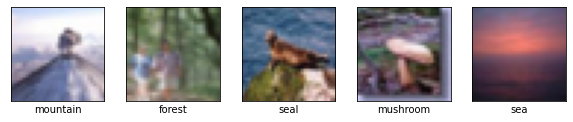

In [ ]:
#TEST SET
plt.figure(figsize=(10,10))
for image in range(0,5):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = X_test[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subCategoryDict['SubClass'][y_test[j]]))
plt.show()

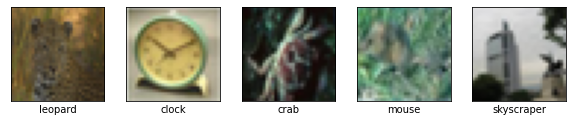

In [ ]:
#TRAIN SET
plt.figure(figsize=(10,10))
for image in range(0,5):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = X_train[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subCategoryDict['SubClass'][y_train[j]]))
plt.show()

# Question-2: Plot the generator and discriminator loss for each epoch.


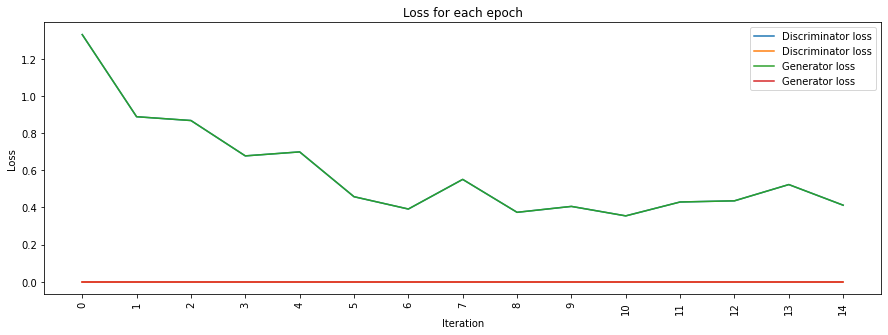

In [ ]:
save_path = '/content/cifar'
image_shape = (32, 32, 3) 
dimension = 100
def build_generator(): 

		model = Sequential() 
		model.add(Dense(128 * 8 * 8, activation="relu", 
						input_dim=dimension)) 
		model.add(Reshape((8, 8, 128))) 
		
		model.add(UpSampling2D()) 
		
		model.add(Conv2D(128, kernel_size=3, padding="same")) 
		model.add(BatchNormalization(momentum=0.78)) 
		model.add(Activation("relu")) 
		
		model.add(UpSampling2D()) 
		
		model.add(Conv2D(64, kernel_size=3, padding="same")) 
		model.add(BatchNormalization(momentum=0.78)) 
		model.add(Activation("relu")) 
		
		model.add(Conv2D(3, kernel_size=3, padding="same")) 
		model.add(Activation("tanh")) 

		noise = Input(shape=(dimension,)) 
		image = model(noise) 

		return Model(noise, image) 
def build_discriminator(): 

		model = Sequential() 

		model.add(Conv2D(32, kernel_size=3, strides=2, 
						input_shape=image_shape, padding="same")) 
		model.add(LeakyReLU(alpha=0.2)) 
		model.add(Dropout(0.25)) 
		
		model.add(Conv2D(64, kernel_size=3, strides=2, padding="same")) 
		model.add(ZeroPadding2D(padding=((0,1),(0,1)))) 
		model.add(BatchNormalization(momentum=0.82)) 
		model.add(LeakyReLU(alpha=0.25)) 
		model.add(Dropout(0.25)) 
		
		model.add(Conv2D(128, kernel_size=3, strides=2, padding="same")) 
		model.add(BatchNormalization(momentum=0.82)) 
		model.add(LeakyReLU(alpha=0.2)) 
		model.add(Dropout(0.25)) 
		
		model.add(Conv2D(256, kernel_size=3, strides=1, padding="same")) 
		model.add(BatchNormalization(momentum=0.8)) 
		model.add(LeakyReLU(alpha=0.25)) 
		model.add(Dropout(0.25))  
		model.add(Flatten()) 
		model.add(Dense(1, activation='sigmoid')) 

		image = Input(shape=image_shape) 
		validity = model(image) 

		return Model(image, validity) 

# Building and compiling the discriminator 
discriminator = build_discriminator() 
discriminator.compile(loss='binary_crossentropy', 
					optimizer=Adam(0.0002,0.5), 
					metrics=['accuracy']) 

discriminator.trainable = False

# Building the generator 
generator = build_generator() 

dummy = Input(shape=(dimension,)) 
image = generator(dummy) 


valid = discriminator(image) 


combined_network = Model(dummy, valid) 
combined_network.compile(loss='binary_crossentropy', 
						optimizer=Adam(0.0002,0.5)) 
num_epochs=15
batch_size=32
display_after=2
losses=[] 
d_loss=[]
g_loss=[]
epoch_g
for i in range(num_epochs)
	epoch_g.append(i)

x_train = (x_train / 127.5) - 1
valid = np.ones((batch_size, 1)) 
valid += 0.05 * np.random.random(valid.shape) 
fake = np.zeros((batch_size, 1)) 
fake += 0.05 * np.random.random(fake.shape) 

for epoch in range(num_epochs): 
            
            index = np.random.randint(0, x_train.shape[0], batch_size) 
            images = x_train[index] 
 
            noise = np.random.normal(0, 1, (batch_size, dimension)) 
            generated_images = generator.predict(noise) 

            discm_loss_real = discriminator.train_on_batch(images, valid) 
            discm_loss_fake = discriminator.train_on_batch(generated_images, fake) 
            discm_loss = 0.5 * np.add(discm_loss_real, discm_loss_fake) 
            d_loss.append(discm_loss)

            genr_loss = combined_network.train_on_batch(noise, valid) 
            g_loss.append(discm_loss)
             
            		
plt.figure(figsize=(15, 5))
plt.plot(epoch_g, d_loss, label="Discriminator loss")
plt.plot(epoch_g, g_loss, label="Generator loss")

plt.xticks(epoch_g, rotation=90)

plt.title("Loss for each epoch")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()


# Question-3: After training generate 5 images and visualize the results.


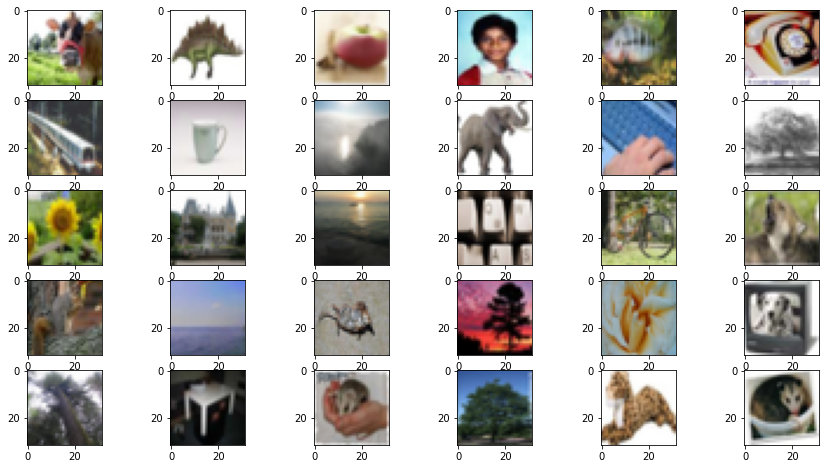

In [ ]:
#Original images 
solid = x_train[:30] 
solid = 0.5 * solid + 0.5
f, ax = plt.subplots(5,6, figsize=(15,8)) 
for i, image in enumerate(solid): 
	ax[i//6, i%6].imshow(image) 
	ax[i//6, i%6].axis('on') 
plt.savefig("/content/originalimages.png")
plt.show() 

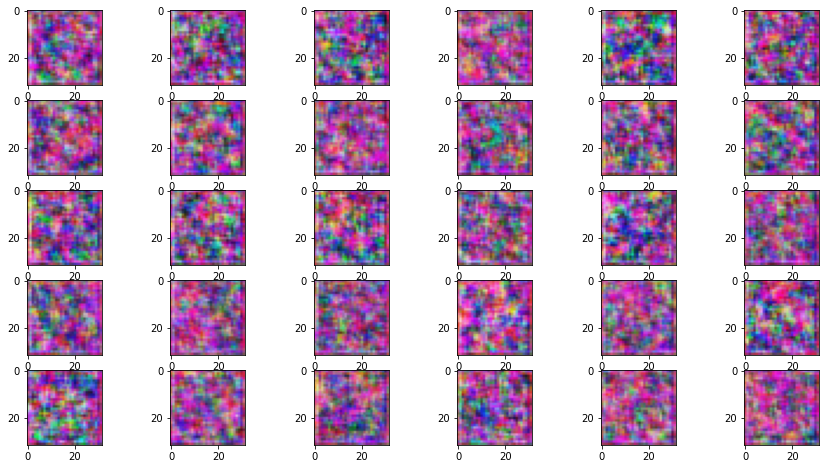

In [ ]:
#generated images 
noise = np.random.normal(size=(30, dimension)) 
generated_images = generator.predict(noise) 
generated_images = 0.5 * generated_images + 0.5
f, ax = plt.subplots(5,6, figsize=(15,8)) 
for i, image in enumerate(generated_images): 
	ax[i//6, i%6].imshow(image) 
	ax[i//6, i%6].axis('on') 
plt.savefig("/content/reconstructedImages.png")
plt.show() 

# **<title color = 'blue'>Lab 2: [CNN] Build and train a CNN based classifier on the CIFAR 10 dataset.</title>**

# Question-1: Plot the train and test loss.

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 16, 16, 32)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 4096)              0         
                                                                 
 dense_18 (Dense)            (None, 256)             

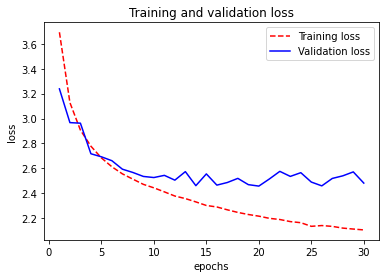

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()
model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()


opt = 'adam'

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
augmenter = ImageDataGenerator(rescale=1.0/255.,
                             rotation_range=20,
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             shear_range=0.1, 
                             zoom_range=0.2, 
                             fill_mode='nearest',
                             horizontal_flip=True)
rescalator=ImageDataGenerator(rescale=1.0/255.)

train_generator=augmenter.flow(X_train, y_train, batch_size=20)
valid_generator=rescalator.flow(X_valid, y_valid, batch_size=20)
test_generator=rescalator.flow(X_test, y_test, batch_size=20)
EPOCHS=30
batch_size=20
steps_per_epoch=train_generator.n//batch_size
validation_steps=valid_generator.n//batch_size
history = model.fit(train_generator,
                        steps_per_epoch=steps_per_epoch,
                        epochs=EPOCHS,
                        validation_data=valid_generator,
                        validation_steps=validation_steps
                        )
plot_history(history)
test_loss,test_acc=model.evaluate(test_generator, verbose=2)


# Question-2: Calculate overall precision, recall, F1 score 

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Precision Score : ",precision_score(y_test, Y_pred_classes, average='micro'))
print("Recall Score : ",recall_score(y_test, Y_pred_classes, average='micro'))
print("f1 Score : ",f1_score(y_test, Y_pred_classes, average='micro'))

Precision Score :  0.1025
Recall Score :  0.1025
f1 Score :  0.1025


# Question -3: Visualize the filters of the CNN.


conv2d_46 (2, 2, 3, 32)
conv2d_47 (2, 2, 32, 64)


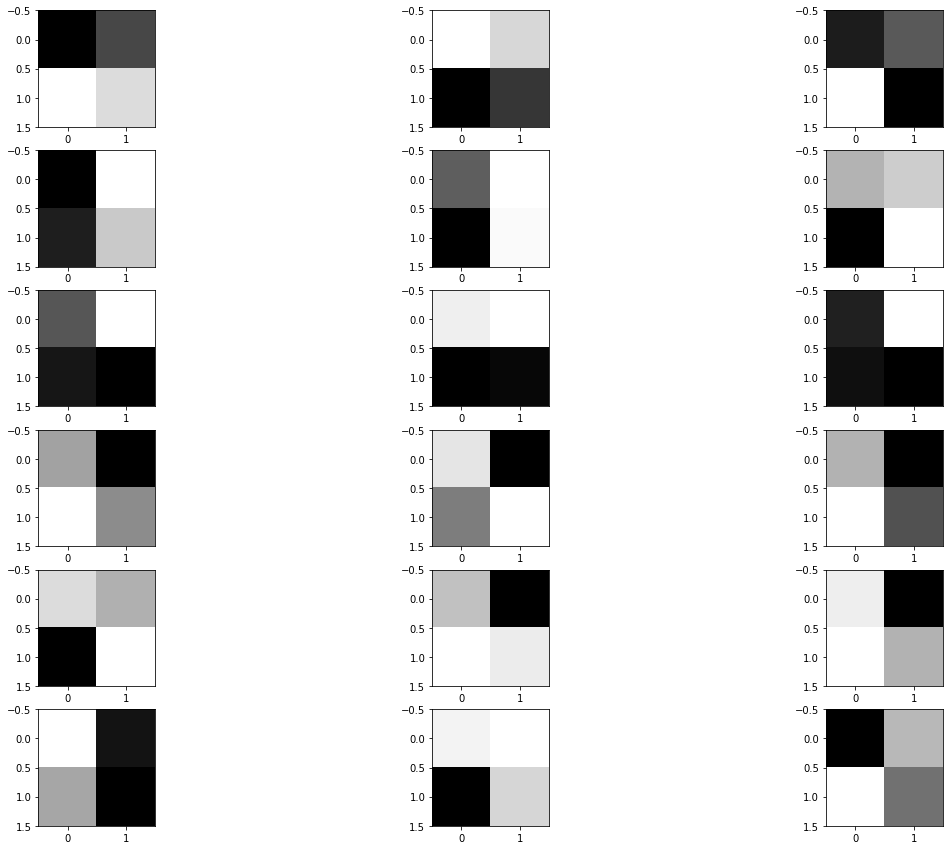

In [ ]:
from matplotlib import pyplot
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)
filters , bias = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters =6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1

pyplot.show()

Check the content of the response


Copyright © 2022 Dkraft. All rights reserved.
